In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("student_clustering.csv")
df.info

<bound method DataFrame.info of      cgpa   iq
0    5.13   88
1    5.90  113
2    8.36   93
3    8.27   97
4    5.45  110
..    ...  ...
195  4.68   89
196  8.57  118
197  5.85  112
198  6.23  108
199  8.82  117

[200 rows x 2 columns]>

In [4]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


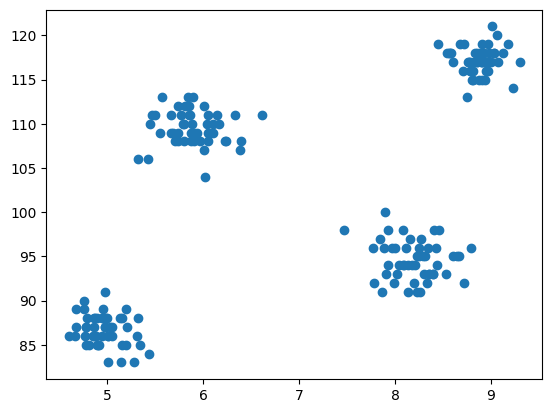

In [5]:
plt.scatter(df['cgpa'],df['iq'])
plt.show()

In [6]:
wcss=[]

for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit_predict(df)
    wcss.append(model.inertia_)

wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 514.1616803171117,
 420.74846722383296,
 302.5473746759042,
 235.30768874397896,
 199.99120032567834,
 178.5233748428242]

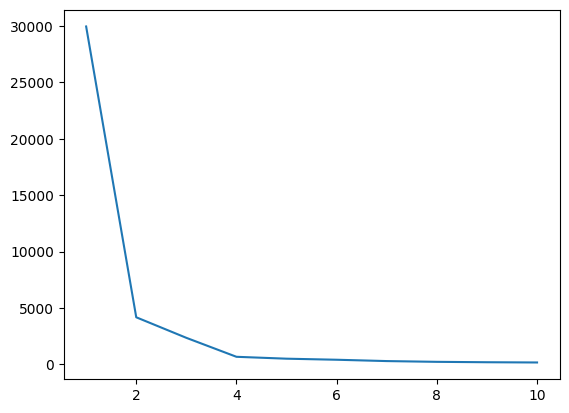

In [7]:
plt.plot(range(1,11),wcss)
plt.show()

In [8]:
X=df.iloc[:,:].values
model= KMeans(n_clusters=4)
Y=model.fit_predict(X)
df["classes"]=Y
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,cgpa,iq,classes
0,5.13,88,3
1,5.90,113,2
2,8.36,93,0
3,8.27,97,0
4,5.45,110,2
...,...,...,...
195,4.68,89,3
196,8.57,118,1
197,5.85,112,2
198,6.23,108,2


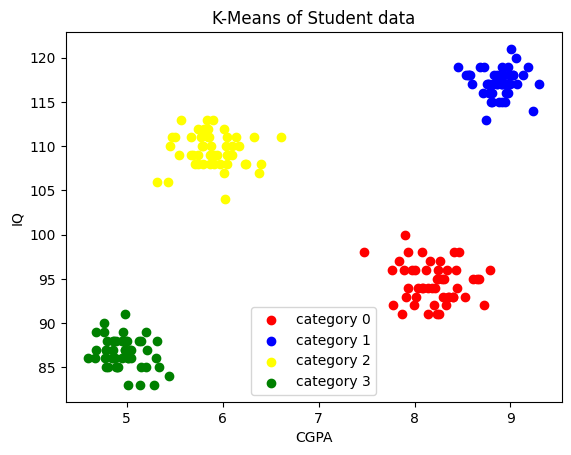

In [9]:
plt.scatter(X[Y==0,0],X[Y==0,1],color='red',label="category 0")
plt.scatter(X[Y==1,0],X[Y==1,1],color='Blue',label="category 1")
plt.scatter(X[Y==2,0],X[Y==2,1],color='Yellow',label="category 2")
plt.scatter(X[Y==3,0],X[Y==3,1],color='Green',label="category 3")
plt.title("K-Means of Student data")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend()
plt.show()

In [10]:
from sklearn.datasets import make_blobs

centtroids = [(-5,-5,5),(5,5,-5),(2.5,-2.5,4),(-2.4,2.5,-4)]
cluster_std=[1,1,1,1]

x,y=make_blobs(n_samples=200,cluster_std=cluster_std,centers=centtroids,n_features=3,random_state=1)

In [12]:
import plotly.express as px

fig = px.scatter_3d(x=x[:,0],y=x[:,1],z=x[:,2])
fig.show()

In [13]:
y=model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [14]:
fig = px.scatter_3d(x=x[:,0],y=x[:,1],z=x[:,2],color=y)
fig.show()